# Week 4 Homework <br> Hotaling, Michael <br> 2020-09-22

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercises 3-1

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [2]:
resp = nsfg.ReadFemResp()

In [3]:
n = resp['numkdhh'].value_counts(dropna = False).sort_index()
total = sum(resp['numkdhh'])
summer = 0 
averager = 1
kids_per_bin_dict = dict()
pmf_dict = dict()
bias_dict = dict()

print("{:<7} | {:>5} | {:>5} | {:>12} | {:<5} ".format("numkdhh","count","pmf", "kids per bin", "bias"))
print("------------------------------------------------")
for key, value in n.items():
    averager += value * key
    pmf_dict[key] = value/total
    kids_per_bin_dict[key] = key * value
    
for key, value in n.items():
    bias = key * value / averager
    bias_dict[key] = bias
    print("{:<7} | {:>5} | {:>5.3f} | {:>12} | {:<5.5f} ".format(key,value, pmf_dict[key], key * value, bias))    
print("------------------------------------------------")

numkdhh | count |   pmf | kids per bin | bias  
------------------------------------------------
0       |  3563 | 0.455 |            0 | 0.00000 
1       |  1636 | 0.209 |         1636 | 0.20897 
2       |  1500 | 0.192 |         3000 | 0.38319 
3       |   666 | 0.085 |         1998 | 0.25521 
4       |   196 | 0.025 |          784 | 0.10014 
5       |    82 | 0.010 |          410 | 0.05237 
------------------------------------------------


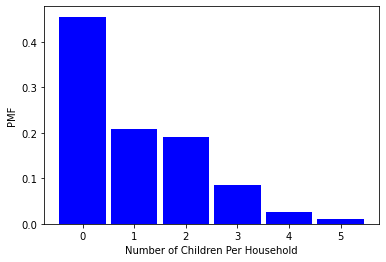

In [4]:
plt.bar(x = pmf_dict.keys(), color = "blue", fill = "black", height = pmf_dict.values(), width = 0.9);
plt.xlabel("Number of Children Per Household")
plt.ylabel("PMF");

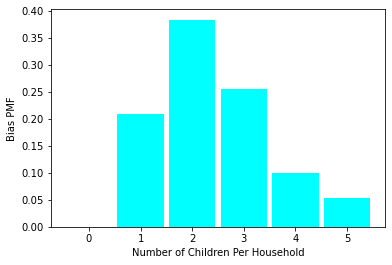

In [5]:
plt.bar(x = bias_dict.keys(), color = "cyan", height = bias_dict.values(), width = 0.9)
plt.xlabel("Number of Children Per Household")
plt.ylabel("Bias PMF");

In [6]:
#biased mean

summer = 0
for key, value in n.items():
    summer += (key * value) * key
summer / sum(resp['numkdhh'])

2.403679100664282

In [7]:
# pmf mean

summer = 0
for i in resp['numkdhh']:
    summer += i
summer / len(resp['numkdhh'])

1.024205155043831

## Exercise 3-2

In [8]:
def pmf_mean(dictionary):
    
    summer = 0
    total = 0
    for key, value in dictionary.items():
        summer += value
        total += 1
    avg = summer/total
    return avg

def pmf_var(dictionary):
    mean = pmf_mean(dictionary)
    summer = 0
    total = 0
    for key, value in dictionary.items():
        summer += (value - mean) ** 2
        total += 1
    avg = summer/total
    return avg


In [9]:
pmf_mean(resp['numkdhh'])

1.024205155043831

In [10]:
thinkstats2.Pmf(resp['numkdhh'], label='numkdhh').Mean()

1.024205155043831

In [11]:
round(pmf_var(resp['numkdhh']),12) # I need to round to match the thinkstats variance calculation

1.412864326353

In [12]:
round(thinkstats2.Pmf(resp['numkdhh'], label='numkdhh').Var(),12)

1.412864326353

## Exercise 4-1

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

I weighted **8 pounds, 8.5 ounces** and I was the first born

In [13]:
preg = nsfg.ReadFemPreg()
preg = preg[preg['birthord'] == 1]

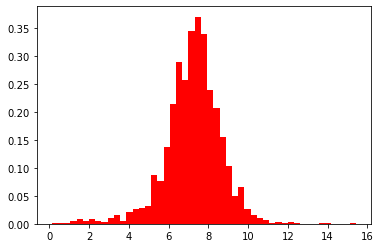

In [14]:
bins = np.linspace(preg['totalwgt_lb'].min(), preg['totalwgt_lb'].max(),50)

data = pd.cut(preg['totalwgt_lb'], bins = bins).value_counts().sort_index()

key_data = []
value_data = []
for key, value in data.items():
    key_data.append(str(key))
    value_data.append(value)

plt.hist(x = preg['totalwgt_lb'], color = "red", bins = bins, cumulative = False, density = True);

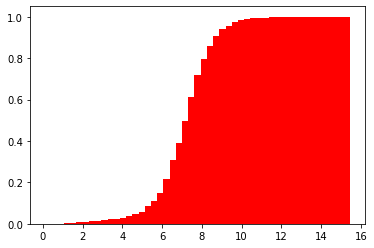

In [15]:
plt.hist(x = preg['totalwgt_lb'], color = "red", bins = bins, cumulative = True, density = True );

In [16]:

def percentile_weight(input, dict, percent_return = False):
    
    # In order for us filter out the NaN values, we can do this. It's a little over complicated
    entries = 0
    for key, values in dict.items():
        try:
            int(values)
            entries += 1
        except:
            pass
    number_of_values_lower = 0
    for key, values in dict.items():
        if values < input:
            number_of_values_lower += 1
    if percent_return == False:
        return number_of_values_lower/entries
    else: 
        return 100 * number_of_values_lower/entries 


In [17]:
percentile_weight(8.53125, preg['totalwgt_lb'], percent_return=True)

85.90419436167774

In [18]:
# My younger brother
preg = nsfg.ReadFemPreg()
preg = preg[preg['birthord'] == 2]
percentile_weight(7.0625, preg['totalwgt_lb'], percent_return=True)

37.034434293745605

## Exercise 4-2

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

(0.0, 0.1]    104
(0.1, 0.2]     96
(0.2, 0.3]    101
(0.3, 0.4]    123
(0.4, 0.5]     98
(0.5, 0.6]     82
(0.6, 0.7]    106
(0.7, 0.8]     97
(0.8, 0.9]     81
(0.9, 1.0]    112
dtype: int64


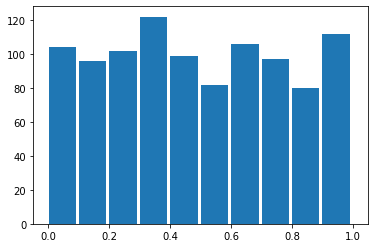

In [19]:
my_random_numbers = np.random.random(1000)
my_bins = np.linspace(0,1,11)

binned_data = pd.cut(my_random_numbers, bins = my_bins).value_counts().sort_index()
print(binned_data)

plt.hist(x = my_random_numbers, width = 0.09);

In [20]:
rand_pmf = {}
start = 0
for key, value in binned_data.items():
    rand_pmf[round(start,2)] = round(value/len(my_random_numbers),3)
    start += 0.1

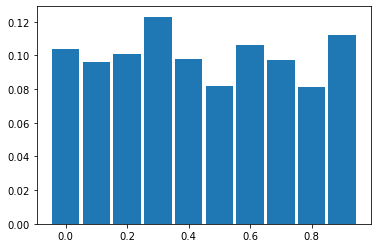

In [21]:
plt.bar(x = rand_pmf.keys(),height = rand_pmf.values(), width = 0.09);

In [22]:
rand_cmf = {}
start = 0
cmf_adder = 0
for key, value in rand_pmf.items():
    cmf_adder += value
    rand_cmf[round(start,3)] = round(cmf_adder,2)
    print(key,"-", rand_cmf[key])
    start += 0.1

0 - 0.1
0.1 - 0.2
0.2 - 0.3
0.3 - 0.42
0.4 - 0.52
0.5 - 0.6
0.6 - 0.71
0.7 - 0.81
0.8 - 0.89
0.9 - 1.0


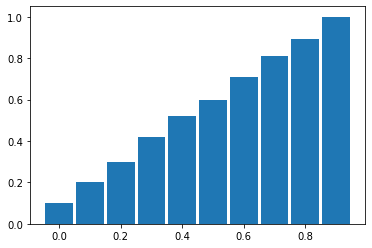

In [23]:
plt.bar(x = rand_cmf.keys(), height = rand_cmf.values(), width = 0.09);

Increasing bin size helps smooth the line

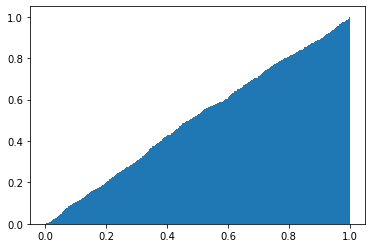

In [24]:
plt.hist(x = my_random_numbers, cumulative=True, density=True, bins = 1000);

The CDF for the random number generation is a straight line, indicating the data is uniform